# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Alif Alferdiansyah
- **Email:** alifalferdiansyah7@gmail.com
- **ID Dicoding:** muhammad_alif_alferdiansyah_g5Ni

## Menentukan Pertanyaan Bisnis

- Apa saja yang memperngaruhi jumlah pengguna sepeda perhari
- Apa yang membedakan pengguna casual dan registered saat menyewa sepeda

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [2]:
day = pd.read_csv("day.csv")
hour = pd.read_csv("hour.csv")

### Assessing Data

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


 ## cek duplikat pada dataset

In [9]:
print(f'Jumlah data duplicate di dataset day : {day.duplicated().sum()}')
print(f'Jumlah data duplicate di dataset hour : {hour.duplicated().sum()}')

Jumlah data duplicate di dataset day : 0
Jumlah data duplicate di dataset hour : 0


**Insight:**
- Ada beberapa kolom (weathersit,season) dan  pada dataset yang terdiri dari int untuk merepresentasikan sebuah object, ini berguna untuk membuat model machine learning tapi sebaiknya kita ganti balik menjadi object agar visualisasi data lebih jelas
- tipe data kolom dteday merupakan object dan bukan datetime
- kedua dataset tidak memiliki missing values sama sekali
- temp dan atemp di normalisasikan sekali lagi berguna untuk melatih model machine learning tapi sedikit susah dipahami oleh manusia
- kolom year dijadikan menjadi bentuk datetime saja agar lebih jelas saat divisualisasikan


### Cleaning Data

#### Merubah kolom dari data numerikal menjadi kategorikal

In [10]:
def temp(df):
    df = df * 41
    return df

In [11]:
day['temp'] = day['temp'].apply(temp)
hour['temp'] = hour['temp'].apply(temp)

In [12]:
hour['temp']

0         9.84
1         9.02
2         9.02
3         9.84
4         9.84
         ...  
17374    10.66
17375    10.66
17376    10.66
17377    10.66
17378    10.66
Name: temp, Length: 17379, dtype: float64

In [13]:
day['temp'] 

0      14.110847
1      14.902598
2       8.050924
3       8.200000
4       9.305237
         ...    
726    10.420847
727    10.386653
728    10.386653
729    10.489153
730     8.849153
Name: temp, Length: 731, dtype: float64

In [14]:
def atemp(df):
    df = df * 50
    return df

In [15]:
def hum_wind(df):
    df['hum'] = df['hum'] * 100
    df['windspeed'] = df['windspeed'] * 67
    return df

In [16]:
day['atemp'] = day['atemp'].apply(atemp)
hour['atemp'] = hour['atemp'].apply(atemp)

In [17]:
hum_wind(day)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [18]:
hum_wind(hour)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,10.66,12.880,60.0,11.0014,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,10.66,12.880,60.0,11.0014,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,10.66,12.880,60.0,11.0014,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,10.66,13.635,56.0,8.9981,13,48,61


In [19]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


In [20]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### sekarang sudah lebih readable datanya tetapi agar lebih mudah dibaca sebaiknya kita bulatkan angkanya

In [21]:
day = day.round(1)
hour = hour.round(1)

In [22]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.8,14.4,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.0,13.6,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.0,13.6,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.8,14.4,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.8,14.4,75.0,0.0,0,1,1


In [23]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.1,18.2,80.6,10.7,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.9,17.7,69.6,16.7,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.1,9.5,43.7,16.6,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.2,10.6,59.0,10.7,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.3,11.5,43.7,12.5,82,1518,1600


### sekarang kita akan menjadikan kolom season dan weathersit menjadi kolom kategorikal 

- menurut penjelasan pada dataset map season merupakan season (1:springer, 2:summer, 3:fall, 4:winter)

In [24]:
season = {1: 'springer', 2 : 'summer', 3: 'fall', 4:'winter'}

In [25]:
day['season'] = day['season'].map(season)
hour['season'] = hour['season'].map(season)

In [26]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,6,0,2,14.1,18.2,80.6,10.7,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,2,14.9,17.7,69.6,16.7,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,1,8.1,9.5,43.7,16.6,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,1,8.2,10.6,59.0,10.7,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,1,9.3,11.5,43.7,12.5,82,1518,1600


In [27]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,0,6,0,1,9.8,14.4,81.0,0.0,3,13,16
1,2,2011-01-01,springer,0,1,1,0,6,0,1,9.0,13.6,80.0,0.0,8,32,40
2,3,2011-01-01,springer,0,1,2,0,6,0,1,9.0,13.6,80.0,0.0,5,27,32
3,4,2011-01-01,springer,0,1,3,0,6,0,1,9.8,14.4,75.0,0.0,3,10,13
4,5,2011-01-01,springer,0,1,4,0,6,0,1,9.8,14.4,75.0,0.0,0,1,1


### selanjutnya kita mengubah kolom weathersit menjadi kolom kategorikal  
menurut penjeasan dataset ini merupakan map dari kolom weathersit
- **weathersit** :  
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
  

karena penjelasan diatas sedikit panjang maka kita akan jadikan seperti:
  - 1: Clear/Cloudy
  - 2: Mist
  - 3: Light Rain
  - 4: Stormy

In [28]:
weathersit = {1: 'Clear/Cloudy', 2: 'Mist', 3:'Light Rain', 4:'Stormy' }

In [29]:
day['weathersit'] = day['weathersit'].map(weathersit)

In [30]:
hour['weathersit'] = hour['weathersit'].map(weathersit)

In [31]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,6,0,Mist,14.1,18.2,80.6,10.7,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,Mist,14.9,17.7,69.6,16.7,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,Clear/Cloudy,8.1,9.5,43.7,16.6,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,Clear/Cloudy,8.2,10.6,59.0,10.7,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,Clear/Cloudy,9.3,11.5,43.7,12.5,82,1518,1600


In [32]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,0,6,0,Clear/Cloudy,9.8,14.4,81.0,0.0,3,13,16
1,2,2011-01-01,springer,0,1,1,0,6,0,Clear/Cloudy,9.0,13.6,80.0,0.0,8,32,40
2,3,2011-01-01,springer,0,1,2,0,6,0,Clear/Cloudy,9.0,13.6,80.0,0.0,5,27,32
3,4,2011-01-01,springer,0,1,3,0,6,0,Clear/Cloudy,9.8,14.4,75.0,0.0,3,10,13
4,5,2011-01-01,springer,0,1,4,0,6,0,Clear/Cloudy,9.8,14.4,75.0,0.0,0,1,1


In [33]:
day['yr'] = day['yr'].apply(lambda x:2011 if  x == 0 else 2012 )

In [34]:
hour['yr'] = hour['yr'].apply(lambda x:2011 if  x == 0 else 2012 )

In [35]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,0,6,0,Mist,14.1,18.2,80.6,10.7,331,654,985
1,2,2011-01-02,springer,2011,1,0,0,0,Mist,14.9,17.7,69.6,16.7,131,670,801
2,3,2011-01-03,springer,2011,1,0,1,1,Clear/Cloudy,8.1,9.5,43.7,16.6,120,1229,1349
3,4,2011-01-04,springer,2011,1,0,2,1,Clear/Cloudy,8.2,10.6,59.0,10.7,108,1454,1562
4,5,2011-01-05,springer,2011,1,0,3,1,Clear/Cloudy,9.3,11.5,43.7,12.5,82,1518,1600


In [36]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,0,0,6,0,Clear/Cloudy,9.8,14.4,81.0,0.0,3,13,16
1,2,2011-01-01,springer,2011,1,1,0,6,0,Clear/Cloudy,9.0,13.6,80.0,0.0,8,32,40
2,3,2011-01-01,springer,2011,1,2,0,6,0,Clear/Cloudy,9.0,13.6,80.0,0.0,5,27,32
3,4,2011-01-01,springer,2011,1,3,0,6,0,Clear/Cloudy,9.8,14.4,75.0,0.0,3,10,13
4,5,2011-01-01,springer,2011,1,4,0,6,0,Clear/Cloudy,9.8,14.4,75.0,0.0,0,1,1


In [37]:
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(day['dteday'])

## Exploratory Data Analysis (EDA)

### Explore 

#### pertama kita akan melihat berdasarkan hari kerja dan hari libur bagaimana jumlah perbandingan jumlah pengguna

In [38]:
day.groupby('workingday')[['casual','registered','cnt']].mean().round(1)

,casual,registered,cnt
workingday,,,
0,1371.1,2959.0,4330.2
1,606.6,3978.2,4584.8


In [39]:
day.groupby('holiday')[['casual','registered','cnt']].mean().round(1)

,casual,registered,cnt
holiday,,,
0,841.8,3685.3,4527.1
1,1064.7,2670.3,3735.0


pengguna registered cenderung menggunakan sepeda pada hari kerja dan sebaliknya untuk pengguna kasual ini, pengguna registered kemungkinan menggunakan sepedanya sebagai trasportasi untuk kerja/sekolah 

#### setelah mengecek berdasarkan hari libur kita akan melihat berdasarkan musim

In [40]:
day.groupby('season')[['casual','registered','cnt']].mean().round(1).sort_values(by = 'cnt', ascending = False)

,casual,registered,cnt
season,,,
fall,1202.6,4441.7,5644.3
summer,1106.1,3886.2,4992.3
winter,729.1,3999.1,4728.2
springer,334.9,2269.2,2604.1


bisa dilihat bahwa sepertinya musim semi dan musim panas merupakan waktu populer untuk pengguna

### sekarang kita lihat jam jam yang populer untuk penggunaan sepeda

In [41]:
hour.groupby(['hr'])[['casual','registered','cnt']].mean().round(1).sort_values(by = 'registered', ascending = False)

,casual,registered,cnt
hr,,,
17,74.3,387.2,461.5
18,61.1,364.4,425.5
8,21.7,337.3,359.0
19,48.8,262.8,311.5
16,73.7,238.2,312.0
7,11.1,201.0,212.1
20,36.2,189.8,226.0
9,30.9,188.4,219.3
12,68.3,185.0,253.3


### seperti yang dihipotesa pada table hari kerja jam dimana paling banyak pengguna sepeda merupakan jam masuk/pulang kerja/sekolah

### lalu mari setelah jam mari kita lihat bulan bulan yang mana saja mempunyai rata rata pengguna terbanyak

In [42]:
day.groupby('mnth')[['casual','registered','cnt']].mean().round(1).sort_values(by = 'cnt', ascending = False)

,casual,registered,cnt
mnth,,,
6,1231.8,4540.6,5772.4
9,1172.0,4594.5,5766.5
8,1161.9,4502.5,5664.4
7,1260.6,4303.1,5563.7
5,1214.3,4135.5,5349.8
10,963.9,4235.4,5199.2
4,1013.4,3471.5,4484.9
11,610.0,3637.1,4247.2
3,716.8,2975.4,3692.3


kalau dilihat jumlah paling sedikit merupakan bulan 12, 1 dan 2 dimana pada bulan itu pekerja dan anak sekolah banyak yang libur karena natal dan tahun baru

### terakhir mari kita lihat kondisi hari berdasarkan bulan

In [43]:
day.groupby('mnth')[['temp','atemp','windspeed','hum']].mean().round(1)

,temp,atemp,windspeed,hum
mnth,,,,
1,9.7,12.0,13.8,58.6
2,12.3,15.0,14.5,56.7
3,16.0,19.1,14.9,58.8
4,19.3,22.9,15.7,58.8
5,24.4,28.3,12.3,68.9
6,28.0,31.9,12.4,57.6
7,31.0,35.2,11.1,59.8
8,29.1,32.6,11.6,63.8
9,25.3,29.0,11.1,71.5


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Text(0, 0.5, 'Total rental sepeda')

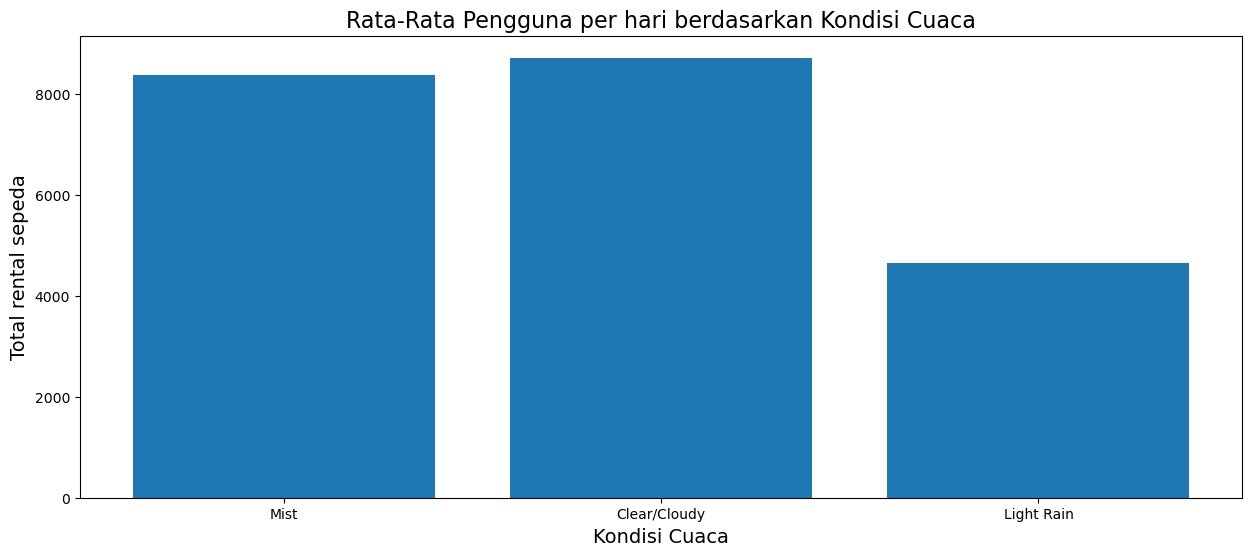

In [44]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(day['weathersit'], height = day['cnt'])
ax.set_title('Rata-Rata Pengguna per hari berdasarkan Kondisi Cuaca', fontsize=16)
ax.set_xlabel('Kondisi Cuaca', fontsize=14)
ax.set_ylabel('Total rental sepeda', fontsize=14)

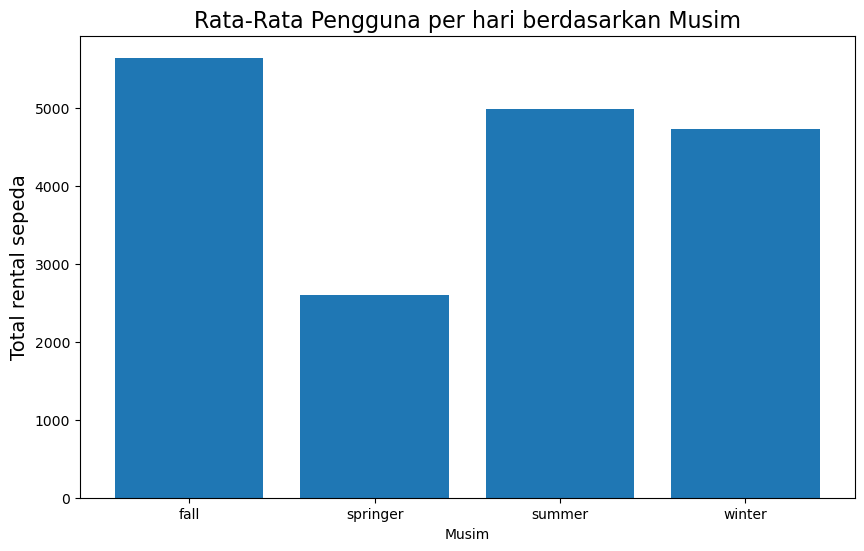

In [45]:
data_musim = day.groupby('season')[['cnt']].mean().round(1)
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(data_musim.index, height = data_musim['cnt'])
ax.set_title('Rata-Rata Pengguna per hari berdasarkan Musim', fontsize=16)
ax.set_xlabel('Musim')
ax.set_ylabel('Total rental sepeda', fontsize=14)
ax.set_xticks(data_musim.index)

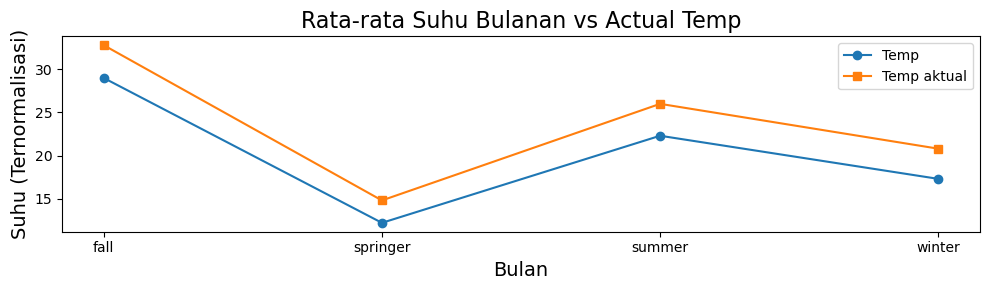

In [46]:
temp_data = day.groupby('season')[['temp', 'atemp', 'windspeed', 'hum']].mean().round(1)
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(temp_data.index, temp_data['temp'], label='Temp', marker='o')
ax.plot(temp_data.index, temp_data['atemp'], label='Temp aktual', marker='s')
ax.set_title('Rata-rata Suhu Bulanan vs Actual Temp', fontsize=16)
ax.set_xlabel('Bulan', fontsize=14)
ax.set_ylabel('Suhu (Ternormalisasi)', fontsize=14)
ax.set_xticks(temp_data.index)
ax.legend()
plt.tight_layout()



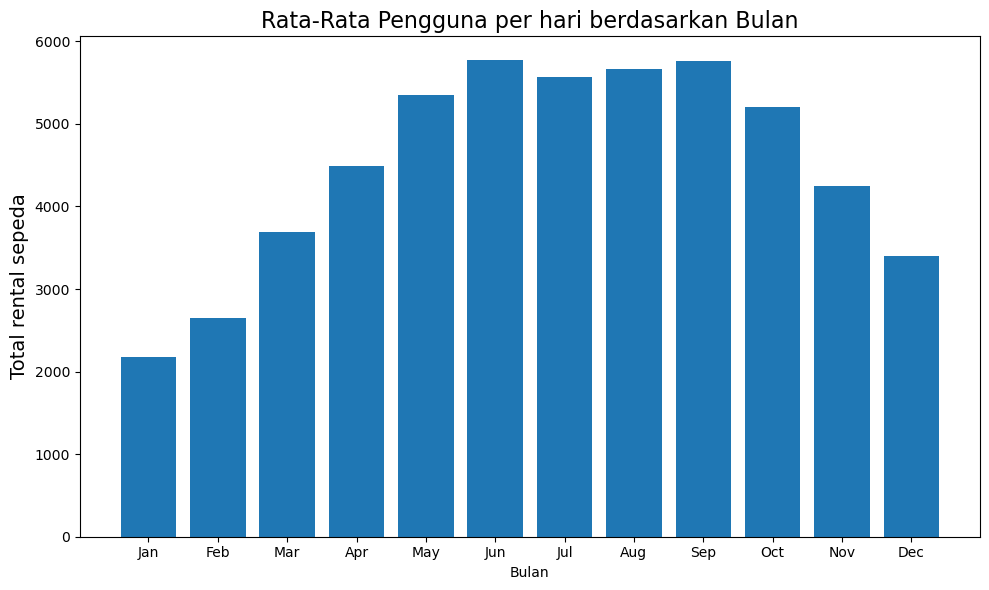

In [47]:
data_perbulan = day.groupby('mnth')[['casual','registered','cnt']].mean().round(1)
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(data_perbulan.index, height = data_perbulan['cnt'])
ax.set_title('Rata-Rata Pengguna per hari berdasarkan Bulan', fontsize=16)
ax.set_xlabel('Bulan')
ax.set_ylabel('Total rental sepeda', fontsize=14)
ax.set_xticks(data_perbulan.index)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()  

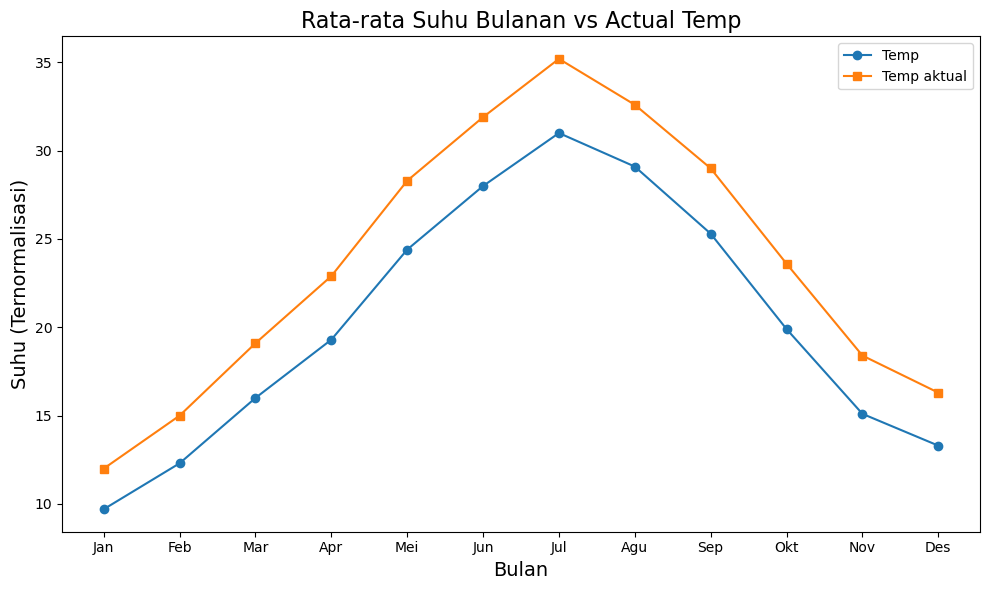

In [48]:
temp_data = day.groupby('mnth')[['temp', 'atemp', 'windspeed', 'hum']].mean().round(1)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(temp_data.index, temp_data['temp'], label='Temp', marker='o')
ax.plot(temp_data.index, temp_data['atemp'], label='Temp aktual', marker='s')
ax.set_title('Rata-rata Suhu Bulanan vs Actual Temp', fontsize=16)
ax.set_xlabel('Bulan', fontsize=14)
ax.set_ylabel('Suhu (Ternormalisasi)', fontsize=14)
ax.set_xticks(temp_data.index)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
ax.legend()
plt.tight_layout()



### Pertanyaan 2:

(-1.0999999579700188,
 1.0999999954356832,
 -1.0999999838525825,
 1.0999999992310754)

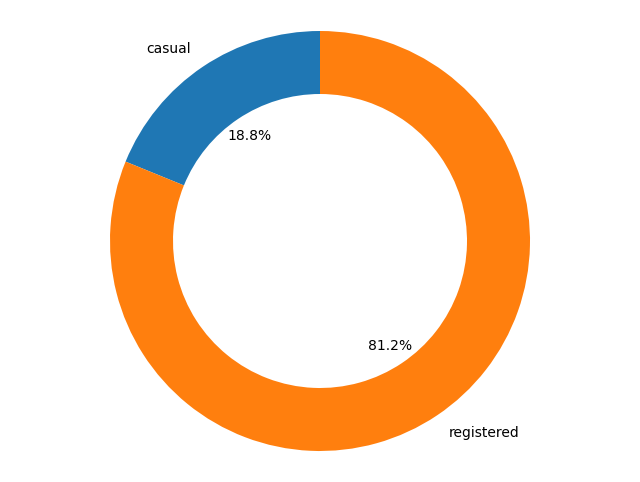

In [49]:
pie_data = day[['casual','registered']].sum()
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(x=pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, wedgeprops = {'width': 0.3})
ax.axis('equal')

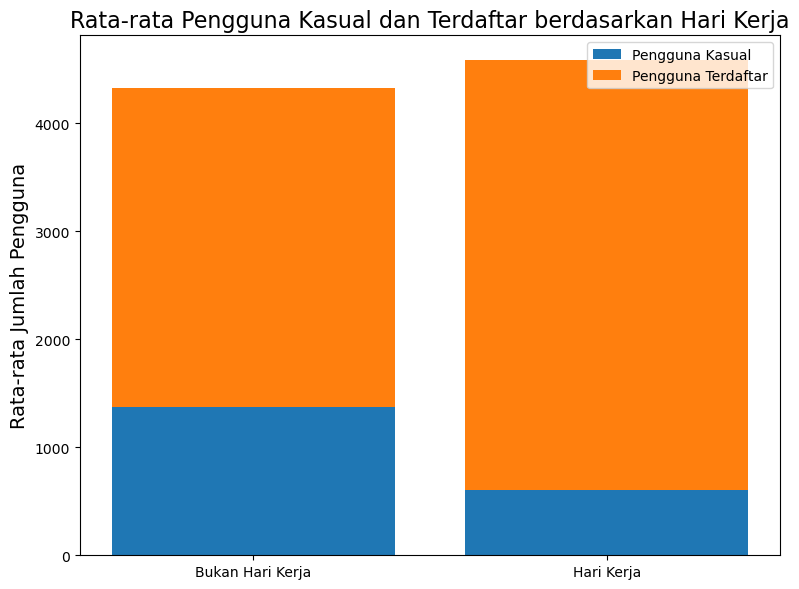

In [50]:
grouped_data = day.groupby('workingday')[['casual', 'registered']].mean().round(1)
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(grouped_data.index, grouped_data['casual'], label='Pengguna Kasual')
ax.bar(grouped_data.index, grouped_data['registered'], bottom=grouped_data['casual'], label='Pengguna Terdaftar')

ax.set_title('Rata-rata Pengguna Kasual dan Terdaftar berdasarkan Hari Kerja', fontsize=16)
ax.set_ylabel('Rata-rata Jumlah Pengguna', fontsize=14)

ax.set_xticks(grouped_data.index)
ax.set_xticklabels(['Bukan Hari Kerja', 'Hari Kerja'])

ax.legend()
plt.tight_layout()
plt.show()


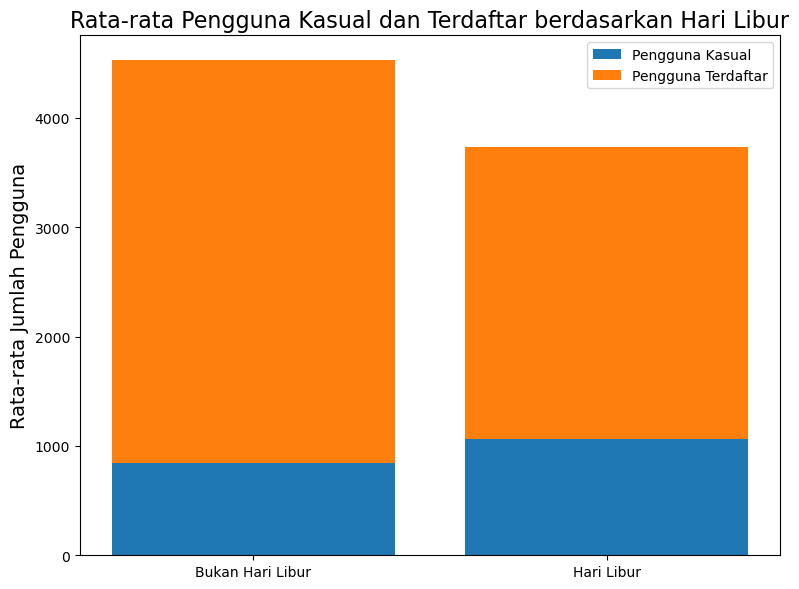

In [51]:
grouped_data = day.groupby('holiday')[['casual', 'registered']].mean().round(1)
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(grouped_data.index, grouped_data['casual'], label='Pengguna Kasual')
ax.bar(grouped_data.index, grouped_data['registered'], bottom=grouped_data['casual'], label='Pengguna Terdaftar')

ax.set_title('Rata-rata Pengguna Kasual dan Terdaftar berdasarkan Hari Libur', fontsize=16)
ax.set_ylabel('Rata-rata Jumlah Pengguna', fontsize=14)

ax.set_xticks(grouped_data.index)
ax.set_xticklabels(['Bukan Hari Libur', 'Hari Libur'])

ax.legend()
plt.tight_layout()
plt.show()


[Text(1, 0, 'Jan'),
 Text(2, 0, 'Feb'),
 Text(3, 0, 'Mar'),
 Text(4, 0, 'Apr'),
 Text(5, 0, 'May'),
 Text(6, 0, 'Jun'),
 Text(7, 0, 'Jul'),
 Text(8, 0, 'Aug'),
 Text(9, 0, 'Sep'),
 Text(10, 0, 'Oct'),
 Text(11, 0, 'Nov'),
 Text(12, 0, 'Dec')]

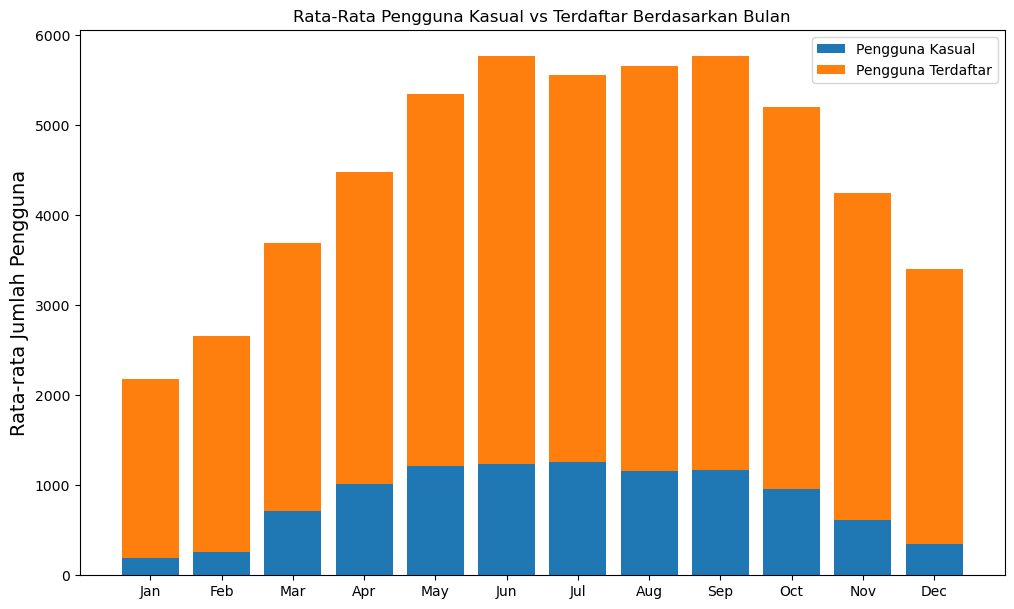

In [52]:
data_perbulan = day.groupby('mnth')[['casual','registered','cnt']].mean().round(1)
fig , ax = plt.subplots(figsize=(10,6))
ax.bar(data_perbulan.index,data_perbulan['casual'], label = 'Pengguna Kasual')
ax.bar(data_perbulan.index, data_perbulan['registered'], label = 'Pengguna Terdaftar', bottom=data_perbulan['casual'])
plt.legend()
plt.tight_layout()
ax.set_title('Rata-Rata Pengguna Kasual vs Terdaftar Berdasarkan Bulan')
ax.set_xlabel = "Bulan"
ax.set_ylabel('Rata-rata Jumlah Pengguna', fontsize=14)
ax.set_xticks(data_perbulan.index)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

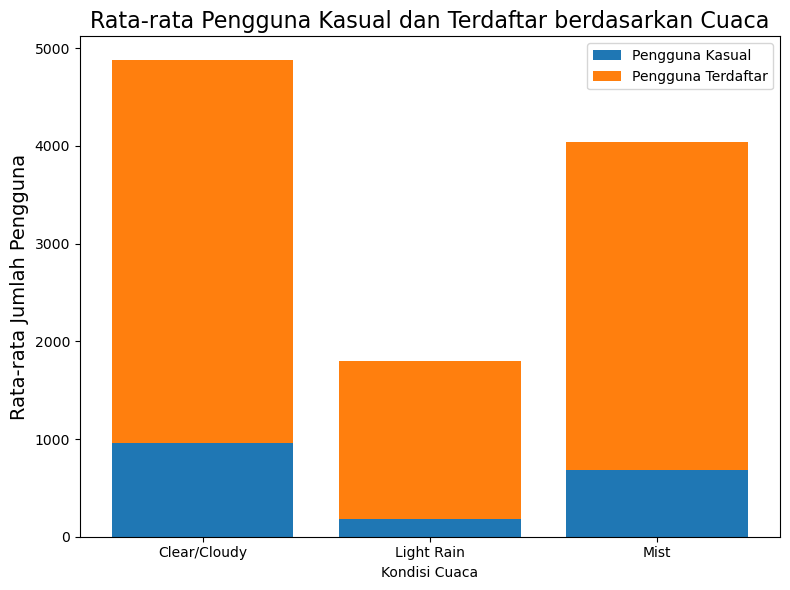

In [53]:
data_cuaca = day.groupby('weathersit')[['casual','registered','cnt']].mean().round(1)
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(data_cuaca.index, data_cuaca['casual'], label='Pengguna Kasual')
ax.bar(data_cuaca.index, data_cuaca['registered'], bottom=data_cuaca['casual'], label='Pengguna Terdaftar')

ax.set_title('Rata-rata Pengguna Kasual dan Terdaftar berdasarkan Cuaca', fontsize=16)
ax.set_xlabel('Kondisi Cuaca')
ax.set_ylabel('Rata-rata Jumlah Pengguna', fontsize=14)
ax.set_xticks(data_cuaca.index)

ax.legend()
plt.tight_layout()
plt.show()


**Insight:**
- rata rata pengguna lebih senang menggunakan sepeda ketika cuaca panas/hangat lebih tepatnya pada musim semi dan musim panas
- cuaca juga mempengaruh penggunaan sepeda, pengguna lebih cenderung menggunakan sepeda pada cuaca bagus atau mendung sedikit
- untuk penyewa yang registered bisa dilihat dari waktu penyewaannya bahwa mereka berkemungkinan besar membawa sepeda untuk pergi atau pulang kerja dikarenakan jumlah registered paling banyak pada waktu pulang dan masuk kerja  

- saat kita lihat data perbulan ternyata juga mendukung hipotesa diatas karena jumlah paling sedikit pada bulan 12 - 1 yaitu dimana waktu dekat natal dan tahun baru dimana pekerja banyak cuti  

- untuk pengguna casual kemungkinan besar merupakan terdiri dari orang orang yang menggunakan sepeda untuk olahraga atau untuk kegiatan rekreasi bisa dilihat dari data kondisi cuaca bahwa jika kondisi cuaca tidak bagus untuk bersepeda secara rekreasi maka jumlah pengguna casual turun secara signifikan  

- pengguna kasual juga meningkat ketika bukan merupakan hari kerja dan juga meningkat saat hari libur juga
- sepertinya dari data tersebut terdiri dari 3 tipe pengguna yaitu  
  - Pengguna sepeda rekreasi  
  - Pengguna sepeda sebagai transportasi kerja/sekolah  
  - Pegguna yang menggunakan sepeda untuk kedua fungsi tersebut  

## Clustering

In [54]:
day['temp'].quantile(0.25)

13.8

In [55]:
day['temp'].mean()

20.310670314637488

In [56]:
day['weathersit'].value_counts()

Clear/Cloudy    463
Mist            247
Light Rain       21
Name: weathersit, dtype: int64

In [57]:
def assign_cluster(row):
    if row['weathersit'] in ['Clear/Cloudy', 'Mist'] and row['temp']>13.8:
        if row['workingday'] == 1:
            if row['registered'] > row['casual']:
                return 'Transportasi Kerja/Sekolah'
            else:
                return 'Kombinasi Transportasi dan Rekreasi'
        else:
            return 'Rekreasi dan Liburan'
    elif row['weathersit'] in ['Light Rain', 'Stormy']:
        return 'Cuaca Buruk'
    elif row['temp'] <= 13.8:
        return 'Cuaca dingin'
    else:
        return 'Kondisi Lain'

In [58]:
day['Cluster'] = day.apply(assign_cluster, axis = 1)

In [59]:
cluster_summary = day.groupby('Cluster').agg({
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum'],
    'cnt': ['mean', 'sum'],
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
})
cluster_summary

casual           registered           \
                                   mean     sum         mean      sum   
Cluster                                                                 
Cuaca Buruk                  185.476190    3895  1617.809524    33974   
Cuaca dingin                 290.094972   51927  2372.229050   424629   
Rekreasi dan Liburan        1753.914110  285888  3408.257669   555546   
Transportasi Kerja/Sekolah   756.269022  278307  4506.828804  1658513   

                                    cnt                temp      atemp  \
                                   mean      sum       mean       mean   
Cluster                                                                  
Cuaca Buruk                 1803.285714    37869  17.771429  20.661905   
Cuaca dingin                2662.324022   476556  10.682123  13.078212   
Rekreasi dan Liburan        5162.171779   841434  23.370552  27.184049   
Transportasi Kerja/Sekolah  5263.097826  1936820  23.783696  27.532065   

                                  hum  windspeed  
                                 mean       mean  
Cluster                                           
Cuaca Buruk                 84.871429  16.295238  
Cuaca dingin                56.844134  13.305587  
Rekreasi dan Liburan        64.642331  12.161963  
Transportasi Kerja/Sekolah  63.598098  12.565217

In [60]:
day['Cluster'].value_counts()

Transportasi Kerja/Sekolah    368
Cuaca dingin                  179
Rekreasi dan Liburan          163
Cuaca Buruk                    21
Name: Cluster, dtype: int64

In [61]:
data_cluster = day

In [65]:
jumlah_cluster = data_cluster.groupby(['mnth', 'Cluster']).size().reset_index(name='Jumlah').sort_values(by = 'Jumlah', ascending = False)
jumlah_cluster

,mnth,Cluster,Jumlah
1,1,Cuaca dingin,51
24,8,Transportasi Kerja/Sekolah,46
19,6,Transportasi Kerja/Sekolah,43
17,5,Transportasi Kerja/Sekolah,43
22,7,Transportasi Kerja/Sekolah,41
37,12,Cuaca dingin,40
5,2,Cuaca dingin,37
27,9,Transportasi Kerja/Sekolah,37
15,4,Transportasi Kerja/Sekolah,36
31,10,Transportasi Kerja/Sekolah,36


In [68]:
    cluster_median = data_cluster.groupby(['mnth', 'Cluster']).size().reset_index(name='Jumlah')
    cluster_median = cluster_median.loc[cluster_median.groupby('mnth')['Jumlah'].idxmax()]
cluster_median

,mnth,Cluster,Jumlah
1,1,Cuaca dingin,51
5,2,Cuaca dingin,37
11,3,Transportasi Kerja/Sekolah,25
15,4,Transportasi Kerja/Sekolah,36
17,5,Transportasi Kerja/Sekolah,43
19,6,Transportasi Kerja/Sekolah,43
22,7,Transportasi Kerja/Sekolah,41
24,8,Transportasi Kerja/Sekolah,46
27,9,Transportasi Kerja/Sekolah,37
31,10,Transportasi Kerja/Sekolah,36


In [69]:
cluster_median = data_cluster.groupby(['season', 'Cluster']).size().reset_index(name='Jumlah')
cluster_median = cluster_median.loc[cluster_median.groupby('season')['Jumlah'].idxmax()]
cluster_median

,season,Cluster,Jumlah
2,fall,Transportasi Kerja/Sekolah,128
4,springer,Cuaca dingin,121
10,summer,Transportasi Kerja/Sekolah,117
14,winter,Transportasi Kerja/Sekolah,83


In [70]:
cluster_median = data_cluster.groupby(['holiday', 'Cluster']).size().reset_index(name='Jumlah')
cluster_median = cluster_median.loc[cluster_median.groupby('holiday')['Jumlah'].idxmax()]
cluster_median

,holiday,Cluster,Jumlah
3,0,Transportasi Kerja/Sekolah,368
5,1,Rekreasi dan Liburan,13


In [71]:
cluster_median = data_cluster.groupby(['weekday', 'Cluster']).size().reset_index(name='Jumlah')
cluster_median = cluster_median.loc[cluster_median.groupby('weekday')['Jumlah'].idxmax()]
cluster_median

,weekday,Cluster,Jumlah
2,0,Rekreasi dan Liburan,77
6,1,Transportasi Kerja/Sekolah,67
9,2,Transportasi Kerja/Sekolah,76
13,3,Transportasi Kerja/Sekolah,73
17,4,Transportasi Kerja/Sekolah,77
20,5,Transportasi Kerja/Sekolah,75
23,6,Rekreasi dan Liburan,73


In [72]:
cluster_median = data_cluster.groupby(['workingday', 'Cluster']).size().reset_index(name='Jumlah')
cluster_median = cluster_median.loc[cluster_median.groupby('workingday')['Jumlah'].idxmax()]
cluster_median

,workingday,Cluster,Jumlah
2,0,Rekreasi dan Liburan,163
5,1,Transportasi Kerja/Sekolah,368


In [73]:
data_cluster.to_csv('all_data.csv')

1. Cluster 'Transportasi Kerja/Sekolah':
Penggunaan Tinggi oleh Pengguna Terdaftar: Rata-rata pengguna terdaftar jauh lebih tinggi dibandingkan pengguna kasual, menunjukkan bahwa banyak pengguna menggunakan sepeda sebagai moda transportasi utama untuk kegiatan sehari-hari seperti pergi ke tempat kerja atau sekolah.
Kondisi Cuaca Baik: Kebanyakan hari dalam cluster ini memiliki cuaca baik atau sedikit mendung, yang mendukung penggunaan sepeda untuk transportasi.
Musim Semi dan Musim Panas: Kebanyakan hari dalam cluster ini terjadi di musim semi dan musim panas, menunjukkan preferensi untuk bersepeda dalam cuaca yang lebih hangat.  
2. Cluster 'Rekreasi dan Liburan':
Dominasi Pengguna Kasual: Pengguna kasual mendominasi cluster ini, menunjukkan bahwa banyak orang menggunakan sepeda untuk rekreasi atau kegiatan liburan.
Weekend dan Hari Libur: Hari dalam cluster ini kebanyakan adalah hari libur atau akhir pekan, menegaskan penggunaan sepeda untuk kegiatan non-kerja.  
Cuaca Baik: Sama seperti cluster sebelumnya, cuaca baik atau sedikit mendung mendukung aktivitas rekreasi luar ruang.
3. Cluster 'Cuaca Buruk':
Penurunan Penggunaan Sepeda: Baik pengguna kasual maupun terdaftar menunjukkan penurunan dalam penggunaan sepeda, yang mungkin disebabkan oleh kondisi cuaca yang kurang mendukung seperti hujan atau badai.


## Conclusion

- Ada beberapa faktor yang mempergaruhi jumlah pengguna perhari yang paling seperti kondisi cuaca pengguna cenderung lebih menggunakan sepeda jika cuara cerah, musim dan cuaca juga menjadi faktor pengguna cenderung lebih menyukai musim semi dan musim panas dikarenakan suhu pada musim tersebut nyaman ketika menggunakan sepeda
- Pengguna Casual menggunakan sepeda untuk rekreasi dan cenderung menggunakan sepeda pada hari libur dan hari non kerja sementara pengguna Registered cenderung menggunakan sepeda sebagai transportasi untuk pergi ke kerja/sekolah berdasarkan waktu dimana terdapat banyak pengguna registered yaitu pada jam masuk sekolah/kerja dan juga pada jam pulang sekolah/kerja